# Combining Heuristic and AutoEncoder Scores

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
hu_df = pd.read_csv("fraud_ScoreAndRanks_HU.csv")
hu_df.head()

,Record,Manhattan_Hu_Score,Euclidean_Hu_Score,Euclidean_Hu_Rank,Manhattan_Hu_Rank
0,1,8.897773,3.684967,1070299.0,1070360.0
1,2,63.334717,29.901021,1070910.0,1070912.0
2,3,0.097159,0.045074,972237.0,976699.0
3,4,0.174390,0.072309,1016548.0,1024722.0
4,5,23.820779,10.455502,1070748.0,1070755.0


In [3]:
ae_df = pd.read_csv("fraud_ScoreAndRanks_AE.csv")
ae_df.head()

,Record,Manhattan Score,Euclidean Score,Euclidean Rank,Manhattan Rank
0,1,7.788621,3.495449,1070454.0,1070507.0
1,2,64.634199,29.361075,1070914.0,1070918.0
2,3,0.107536,0.044826,994124.0,1004014.0
3,4,0.150953,0.067885,1030781.0,1031880.0
4,5,22.111508,9.684507,1070770.0,1070780.0


In [4]:
allScores_df = ae_df.join(hu_df.set_index('Record'), on='Record')

In [5]:
allScores_df.head()

,Record,Manhattan Score,Euclidean Score,Euclidean Rank,Manhattan Rank,Manhattan_Hu_Score,Euclidean_Hu_Score,Euclidean_Hu_Rank,Manhattan_Hu_Rank
0,1,7.788621,3.495449,1070454.0,1070507.0,8.897773,3.684967,1070299.0,1070360.0
1,2,64.634199,29.361075,1070914.0,1070918.0,63.334717,29.901021,1070910.0,1070912.0
2,3,0.107536,0.044826,994124.0,1004014.0,0.097159,0.045074,972237.0,976699.0
3,4,0.150953,0.067885,1030781.0,1031880.0,0.174390,0.072309,1016548.0,1024722.0
4,5,22.111508,9.684507,1070770.0,1070780.0,23.820779,10.455502,1070748.0,1070755.0


In [6]:
#Check for NaNs
allScores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070994 entries, 0 to 1070993
Data columns (total 9 columns):
Record                1070994 non-null int64
Manhattan Score       1070994 non-null float64
Euclidean Score       1070994 non-null float64
Euclidean Rank        1070994 non-null float64
Manhattan Rank        1070994 non-null float64
Manhattan_Hu_Score    1070994 non-null float64
Euclidean_Hu_Score    1070994 non-null float64
Euclidean_Hu_Rank     1070994 non-null float64
Manhattan_Hu_Rank     1070994 non-null float64
dtypes: float64(8), int64(1)
memory usage: 73.5 MB


## Euclidean

In [7]:
eucScores_df = allScores_df.loc[:, allScores_df.columns.str.contains('Euclidean')]
eucScores_df.insert(0,'Record',eucScores_df.index+1)
eucScores_df.head()

,Record,Euclidean Score,Euclidean Rank,Euclidean_Hu_Score,Euclidean_Hu_Rank
0,1,3.495449,1070454.0,3.684967,1070299.0
1,2,29.361075,1070914.0,29.901021,1070910.0
2,3,0.044826,994124.0,0.045074,972237.0
3,4,0.067885,1030781.0,0.072309,1016548.0
4,5,9.684507,1070770.0,10.455502,1070748.0


In [8]:
wt_Hu = 0.5
wt_Ae=0.5
wt_Var=(wt_Hu**2)+(wt_Ae**2)
eucScores_df['Wt_AeHu_Zscore']=wt_Hu*eucScores_df['Euclidean_Hu_Score']+wt_Ae*eucScores_df['Euclidean Score']
#eucScores_df['Wt_AeHu_ZscoreII']=(wt_Hu*eucScores_df['Euclidean_Hu_Score']+wt_Ae*eucScores_df['Euclidean Score'])/(wt_Var)
eucScores_df.head()

C:\Users\Gregy\Anaconda3\Anaconda3_USC\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Record,Euclidean Score,Euclidean Rank,Euclidean_Hu_Score,Euclidean_Hu_Rank,Wt_AeHu_Zscore
0,1,3.495449,1070454.0,3.684967,1070299.0,3.590208
1,2,29.361075,1070914.0,29.901021,1070910.0,29.631048
2,3,0.044826,994124.0,0.045074,972237.0,0.044950
3,4,0.067885,1030781.0,0.072309,1016548.0,0.070097
4,5,9.684507,1070770.0,10.455502,1070748.0,10.070004


In [9]:
eucScores_df['Wt_AeHu_Z_Rank'] = eucScores_df['Wt_AeHu_Zscore'].rank(ascending=1)

eucScores_df.head()

C:\Users\Gregy\Anaconda3\Anaconda3_USC\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Record,Euclidean Score,Euclidean Rank,Euclidean_Hu_Score,Euclidean_Hu_Rank,Wt_AeHu_Zscore,Wt_AeHu_Z_Rank
0,1,3.495449,1070454.0,3.684967,1070299.0,3.590208,1070385.0
1,2,29.361075,1070914.0,29.901021,1070910.0,29.631048,1070913.0
2,3,0.044826,994124.0,0.045074,972237.0,0.044950,981453.0
3,4,0.067885,1030781.0,0.072309,1016548.0,0.070097,1022442.0
4,5,9.684507,1070770.0,10.455502,1070748.0,10.070004,1070761.0


In [10]:
eucScores_df.sort_values('Wt_AeHu_Z_Rank',ascending=False).to_csv('fraud_ScoreAndRanks_Euclidean.csv',index=False)

In [11]:
eucScores_df['Wt_AeHu_Zscore'].max()

1515.607345142903

In [12]:
eucScores_df.sort_values('Wt_AeHu_Z_Rank',ascending=False).head(10)

,Record,Euclidean Score,Euclidean Rank,Euclidean_Hu_Score,Euclidean_Hu_Rank,Wt_AeHu_Zscore,Wt_AeHu_Z_Rank
917941,917942,1515.356066,1070994.0,1515.858624,1070994.0,1515.607345,1070994.0
632815,632816,1341.344234,1070993.0,1342.360691,1070993.0,1341.852462,1070993.0
565391,565392,1178.906699,1070992.0,1180.496551,1070992.0,1179.701625,1070992.0
67128,67129,780.246761,1070991.0,781.532251,1070991.0,780.889506,1070991.0
565397,565398,645.192100,1070990.0,646.865899,1070990.0,646.028999,1070990.0
918203,918204,570.903356,1070989.0,572.597113,1070989.0,571.750234,1070989.0
585117,585118,326.750414,1070988.0,328.569951,1070988.0,327.660182,1070988.0
585119,585120,281.326021,1070987.0,283.140425,1070987.0,282.233223,1070987.0
85885,85886,261.620377,1070986.0,263.228291,1070986.0,262.424334,1070986.0
585438,585439,143.934021,1070985.0,146.207468,1070985.0,145.070744,1070985.0


# Plots

## AutoEncoder - model 1 Score

C:\Users\Gregy\Anaconda3\Anaconda3_USC\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


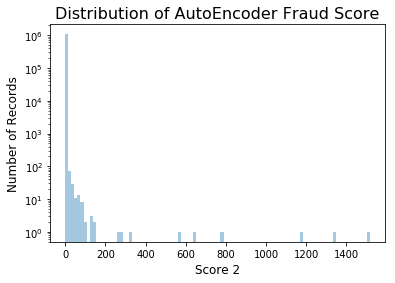

In [13]:
colName='Euclidean Score'

temp = eucScores_df

#xhigh =1.25
#temp = eucScores_df[eucScores_df[colName] <= xhigh]

sns.distplot(temp[colName],bins=100, kde = False)
plt.title('Distribution of AutoEncoder Fraud Score', fontsize=16)
#plt.xscale('log')
plt.yscale('log')
plt.ylabel('Number of Records', fontsize=12)
#plt.ylim((0.00, 25)) 
#plt.xlim((0.00, 25)) 
plt.xlabel("Score 2", fontsize=12)
#plt.savefig("imgs/"+colName+".png")
plt.show()

## Heuristic - model 2 Score

C:\Users\Gregy\Anaconda3\Anaconda3_USC\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


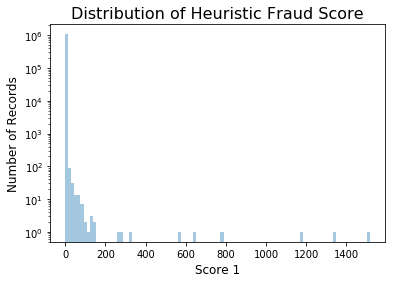

In [14]:
colName='Euclidean_Hu_Score'

temp = eucScores_df

#xhigh =1.25
#temp = eucScores_df[eucScores_df[colName] <= xhigh]

sns.distplot(temp[colName],bins=100, kde = False)
plt.title('Distribution of Heuristic Fraud Score', fontsize=16)
#plt.xscale('log')
plt.yscale('log')
plt.ylabel('Number of Records', fontsize=12)
#plt.ylim((0.00, 25)) 
#plt.xlim((0.00, 25)) 
plt.xlabel('Score 1', fontsize=12)
#plt.savefig("imgs/"+colName+".png")
plt.show()

## Final Score - Combination of AE and HU

C:\Users\Gregy\Anaconda3\Anaconda3_USC\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


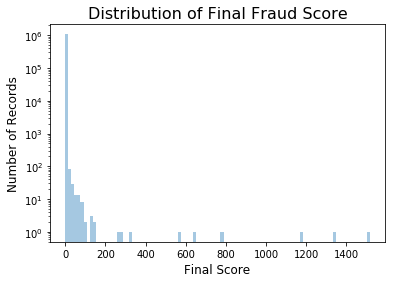

In [15]:
colName='Wt_AeHu_Zscore'

temp = eucScores_df

#xhigh =1.25
#temp = eucScores_df[eucScores_df[colName] <= xhigh]

sns.distplot(temp[colName],bins=100, kde = False)
plt.title('Distribution of Final Fraud Score', fontsize=16)
#plt.xscale('log')
plt.yscale('log')
plt.ylabel('Number of Records', fontsize=12)
#plt.ylim((0.00, 25)) 
#plt.xlim((0.00, 25)) 
plt.xlabel('Final Score', fontsize=12)
#plt.savefig("imgs/"+colName+".png")
plt.show()

C:\Users\Gregy\Anaconda3\Anaconda3_USC\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


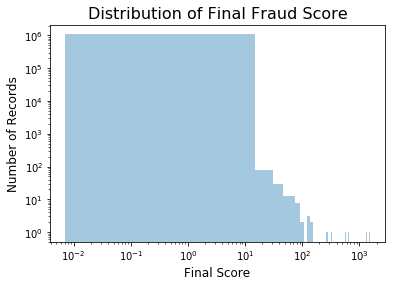

In [16]:
colName='Wt_AeHu_Zscore'

temp = eucScores_df

#xhigh =1.25
#temp = eucScores_df[eucScores_df[colName] <= xhigh]

sns.distplot(temp[colName],bins=100, kde = False)
plt.title('Distribution of Final Fraud Score', fontsize=16)
plt.xscale('log')
plt.yscale('log')
plt.ylabel('Number of Records', fontsize=12)
#plt.ylim((0.00, 25)) 
#plt.xlim((0.00, 25)) 
plt.xlabel('Final Score', fontsize=12)
#plt.savefig("imgs/"+colName+".png")
plt.show()

C:\Users\Gregy\Anaconda3\Anaconda3_USC\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<function matplotlib.pyplot.show(*args, **kw)>

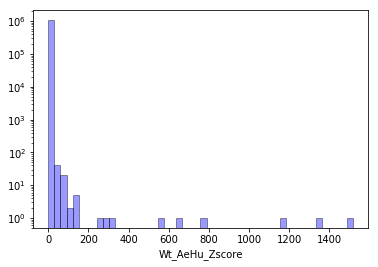

In [91]:
ax = sns.distplot(eucScores_df['Wt_AeHu_Zscore'],\
             bins = 50, kde = False, hist = True, color = 'blue', hist_kws={'edgecolor':'black'})
ax.set_yscale('log')
plt.show

C:\Users\Gregy\Anaconda3\Anaconda3_USC\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


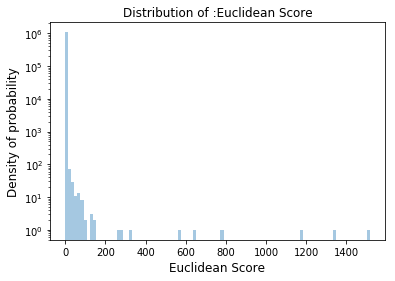

In [88]:
colName='Euclidean Score'
xhigh =1500 #1.25
#sns.plt.xlim(0,xhigh)
temp = eucScores_df
#temp = eucScores_df[eucScores_df[colName] <= xhigh]
sns.distplot(temp[colName],bins=100, kde=False)
plt.title('Distribution of :'+colName)
#plt.xscale('log')
plt.yscale('log')
plt.ylabel('Density of probability', fontsize=12)
#plt.ylim((0.00, 30)) 
#plt.xlim((0.00, 25)) 
plt.xlabel(colName, fontsize=12)
#plt.savefig("imgs/"+colName+".png")
plt.show()

## Check the original data

In [ ]:
NY_df = pd.read_csv("Combined After Fill Missing.csv")

In [ ]:
NY_df["Fr_Rank"] = eucScores_df['Wt_AeHu_Z_Rank']
#NY_df["Fr_Rank"] = eucScores_df['Wt_AeHu_Z_Rank']
#NY_df["Fr_Rank"] = eucScores_df['Wt_AeHu_Z_Rank']
NY_df.head()

In [ ]:
NY_FraudSorted = NY_df.sort_values('Fr_Rank',ascending=False)

In [ ]:
NY_FraudSorted.head()

In [ ]:
NY_FraudSorted.to_csv('NY_FraudSorted.csv',index=False)

In [ ]:
fraud10 = ['930998',
            '371906',
            '850051',
            '514815',
            '110315',
            '189515',
            '706903',
            '917472',
            '864377',
            '892316']

In [ ]:
fraud10

In [ ]:
#NY_df.loc[NY_df['RECORD'].isin(fraud10)]

In [ ]:
cols = ["RECORD",
        "Fr_Rank",
        "LTfront",
        "LTdepth",
        "BLDfront",
        "BLDdepth",
        "STORIES",
        "OWNER",
        "BLDGCL",
        "TAXCLASS",
        "ZIP"
       ]

In [ ]:
NY_FraudSorted[cols].head(10)

In [ ]:
colName='Wt_AeHu_Z_Rank'
#xhigh =1.25
#sns.plt.xlim(0,xhigh)
temp = eucScores_df
#temp = eucScores_df[eucScores_df[colName]] #<= xhigh]
sns.distplot(temp[colName],bins=10000, kde=True)
plt.title('Distribution of :'+colName)
#plt.xscale('log')
plt.ylabel('Density of probability', fontsize=12)
plt.ylim((0.00, 25)) 
#plt.xlim((0.00, 25)) 
plt.xlabel(colName, fontsize=12)
#plt.savefig("imgs/"+colName+".png")
plt.show()